In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

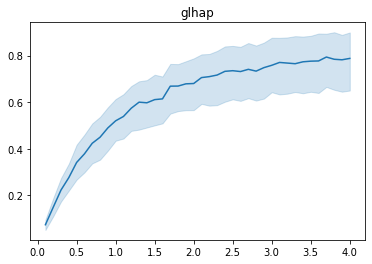

In [107]:
xs_glhap = np.array([])
ys_glhap = np.array([])
with open('../files/bam_list.txt') as f:
    for file in f: 
        file = file.split('.')[0]
        if not (os.path.isfile(f'../files/haplogrep/{file}.haplogrep.txt') or
                os.path.isfile(f'../files/glhap/{file}.glhap.txt')):
            continue
        x_haplogrep = np.loadtxt(f'../files/haplogrep/{file}.haplogrep.txt')
        x_glhap = np.loadtxt(f'../files/glhap/{file}.glhap.txt')
        if x_haplogrep.shape[1] == 3 or x_glhap.shape[1] == 3:
            continue
        # plt.plot(x_glhap[0], x_glhap[1], label = 'glhap')
        # plt.plot(x_haplogrep[0], x_haplogrep[1], label = 'haplogrep')
        # plt.legend()
        # plt.title(f'{file}')
        # plt.show()
        xs_glhap = np.concatenate([xs_glhap, x_glhap[0]])
        ys_glhap = np.concatenate([ys_glhap, x_glhap[1]])
    sns.lineplot(x=xs_glhap, y=ys_glhap)
    plt.title('glhap')

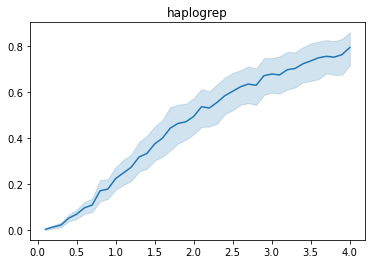

In [108]:
xs_haplogrep = np.array([])
ys_haplogrep = np.array([])
with open('../files/bam_list.txt') as f:
    for file in f: 
        file = file.split('.')[0]
        if not (os.path.isfile(f'../files/haplogrep/{file}.haplogrep.txt') or
                os.path.isfile(f'../files/glhap/{file}.glhap.txt')):
            continue
        x_haplogrep = np.loadtxt(f'../files/haplogrep/{file}.haplogrep.txt')
        x_glhap = np.loadtxt(f'../files/glhap/{file}.glhap.txt')
        if x_haplogrep.shape[1] == 3 or x_glhap.shape[1] == 3:
            continue
        # plt.plot(x_glhap[0], x_glhap[1], label = 'glhap')
        # plt.plot(x_haplogrep[0], x_haplogrep[1], label = 'haplogrep')
        # plt.legend()
        # plt.title(f'{file}')
        # plt.show()
        xs_haplogrep = np.concatenate([xs_haplogrep, x_haplogrep[0]])
        ys_haplogrep = np.concatenate([ys_haplogrep, x_haplogrep[1]])
    sns.lineplot(x=xs_haplogrep, y=ys_haplogrep)
    plt.title('haplogrep')

<AxesSubplot:>

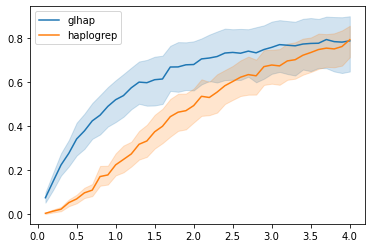

In [109]:
sns.lineplot(x=xs_glhap, y=ys_glhap, label = 'glhap')
sns.lineplot(x=xs_haplogrep, y=ys_haplogrep, label = 'haplogrep')

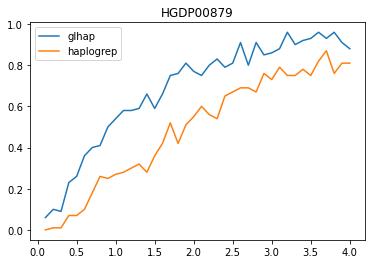

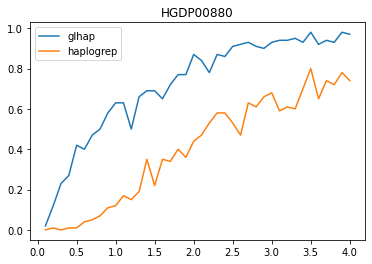

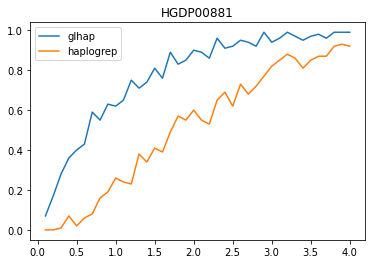

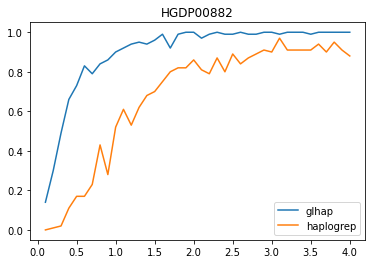

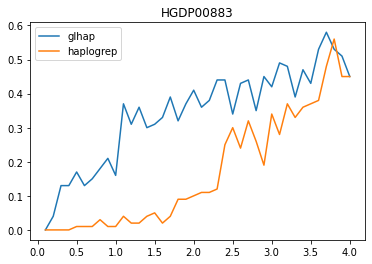

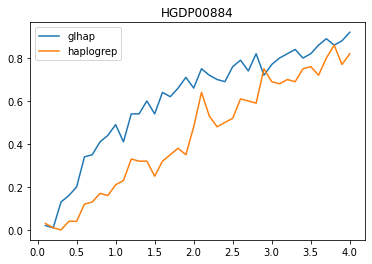

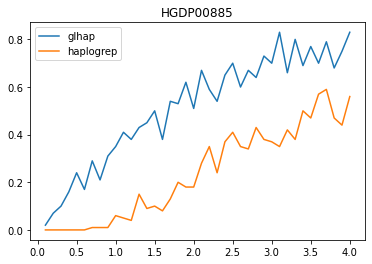

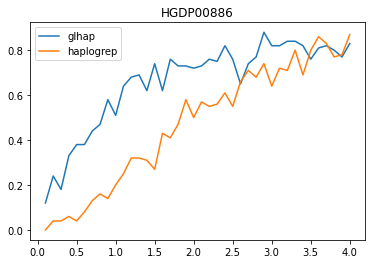

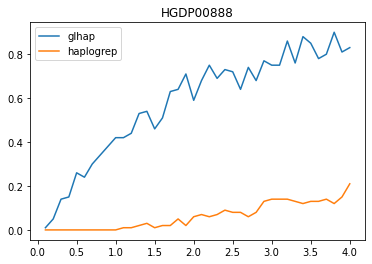

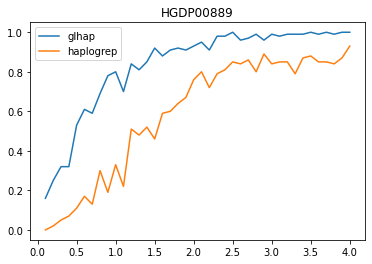

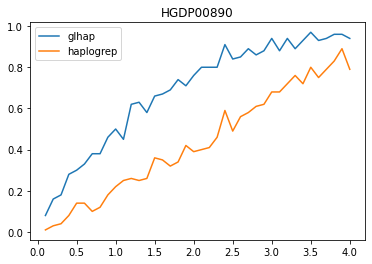

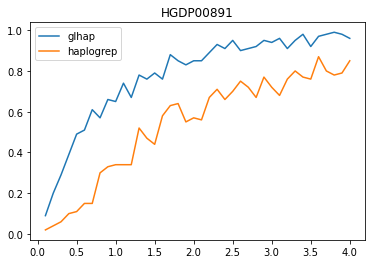

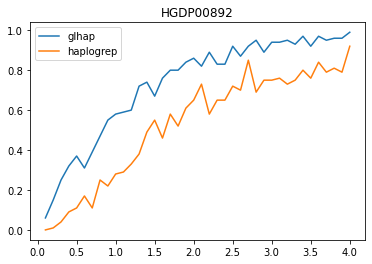

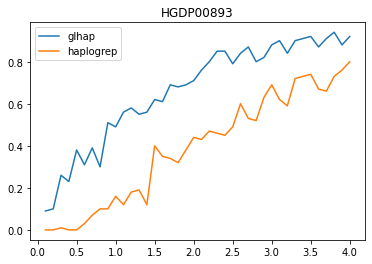

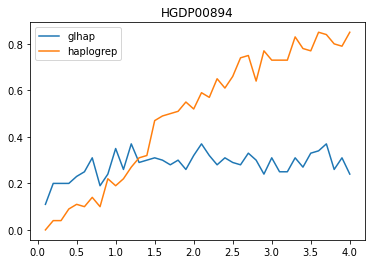

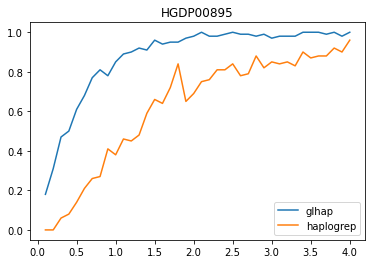

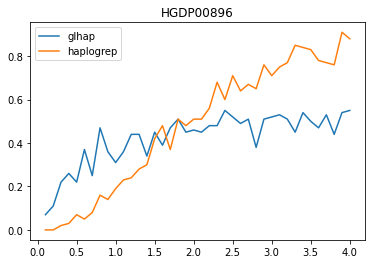

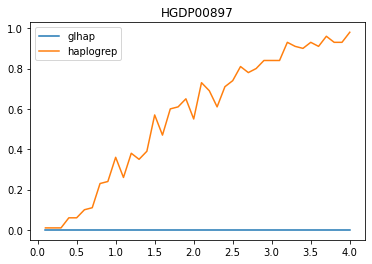

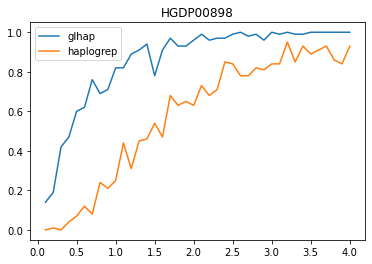

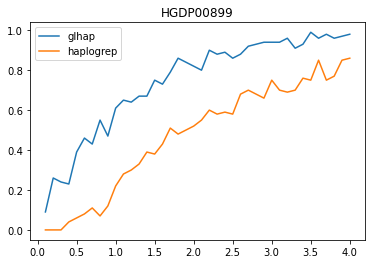

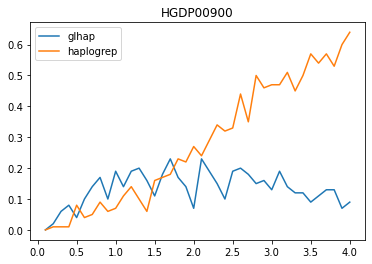

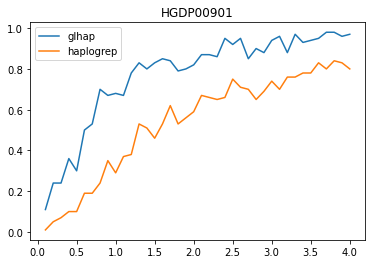

In [110]:
xs_glhap = np.array([])
ys_glhap = np.array([])
with open('../files/bam_list.txt') as f:
    for file in f: 
        file = file.split('.')[0]
        if not (os.path.isfile(f'../files/haplogrep/{file}.haplogrep.txt') or
                os.path.isfile(f'../files/glhap/{file}.glhap.txt')):
            continue
        x_haplogrep = np.loadtxt(f'../files/haplogrep/{file}.haplogrep.txt')
        x_glhap = np.loadtxt(f'../files/glhap/{file}.glhap.txt')
        if x_haplogrep.shape[1] == 3 or x_glhap.shape[1] == 3:
            continue
        plt.plot(x_glhap[0], x_glhap[1], label = 'glhap')
        plt.plot(x_haplogrep[0], x_haplogrep[1], label = 'haplogrep')
        plt.legend()
        plt.title(f'{file}')
        plt.show()
    #     xs_glhap = np.concatenate([xs_glhap, x_glhap[0]])
    #     ys_glhap = np.concatenate([ys_glhap, x_glhap[1]])
    # sns.lineplot(x=xs_glhap, y=ys_glhap)
    # plt.title('glhap')

In [101]:
def downsample(fn, depth, original_depth=None):
    while True:
        if original_depth == None:
            original_depth = get_mean_depth(fn)
        prop = depth/original_depth
        os.system(f'samtools view -b -s {prop + random.randint(1,10000)} {fn} > {fn[:-4]}.cov_{depth}.bam')
        if get_mean_depth(f'{fn[:-4]}.cov_{depth}.bam') != 0:
            break
    return 0


def get_mean_depth(fn):
    stats = pd.read_csv(io.StringIO(subprocess.check_output(['samtools', 'coverage', fn]).decode()), sep="\t").iloc[0]
    if (stats.iloc[0] != 'chrM'):
        return 0
    mean_depth = stats.iloc[6]
    return mean_depth

In [103]:
fn = 'HGDP00879.alt_bwamem_GRCh38DH.20181023.Russian.cram.bam'
mean_depth = get_mean_depth(fn)
s = 0
for i in range(30):
    downsample(fn, 0.11, mean_depth)
    fn_down = f'{fn[:-4]}.cov_0.11.bam'
    mm = get_mean_depth(fn_down)
    print(mm)
    s+= mm
print(s/30)

0.0893838
0.107309
0.091134
0.164041
0.108938
0.10073
0.127588
0.0729072
0.0726055
0.140805
0.091134
0.0823224
0.113887
0.10743
0.091134
0.182268
0.10924
0.106404
0.109059
0.0546804
0.182268
0.121552
0.091134
0.160299
0.091134
0.0729072
0.0903494
0.0729072
0.0516627
0.0724244
0.10432127333333334


In [69]:
import pandas as pd

In [71]:
import subprocess
import pandas as pd
import io
import os
import glhap_app
import random
import matplotlib.pyplot as plt
import numpy as np
import sys

In [85]:
f = 'HGDP00879.alt_bwamem_GRCh38DH.20181023.Russian.cram.cov_0.1.bam'

In [86]:
stats = pd.read_csv(io.StringIO(subprocess.check_output(['samtools', 'coverage', f]).decode()), sep="\t").iloc[0]


In [89]:
stats

#rname            chr1
startpos             1
endpos       248956422
numreads             0
covbases             0
coverage             0
meandepth            0
meanbaseq            0
meanmapq             0
Name: 0, dtype: object